In [1]:
#ds imports
import pandas as pd
import numpy as np
import os
import wrangle as wr
import explore as ex
import model as mo
# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["font.size"] = 10
# splitting
from sklearn.model_selection import train_test_split
import scipy.stats as stats
# sklearn
import sklearn.preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#CATboost imports
from catboost import CatBoostClassifier

### PLEASE understand the README FILE before browsing this notebook for a broader understanding of the project context.

# ACQUIRE and Prep:


Inspired dataset courtesy of https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data, we created and curated a dataset by scrapping https://www.pro-football-reference.com. Features indicating meta-game conditions were included and/or engineered from existing data with dates ranging from 1979-2023.

- For information on how the data was scrapped, go to the aquire_j notebook in the ACQUIRE folder in the Github Repository. 

- For information on how the data was prepped, go to the josh_prep.ipynb notebook in the PREPARE folder in the Github Repository.

|Feature |  Data type | Definition |
|---|---|---|
| date: | object | Day-Month-Year|
| day_of_weeky: | int  | Day of the week when the game begins |
| start_times: | int  | Hour of the day when the game begins |
| week_num: | int  | Week number for the game during the season |
| home_score: | int | Final score for home team |
| home_wins: | int | Total home team wins before game start |
| away_score: | int  | Final score for away team |
| away_wins: | int  | Total home team wins before game start  |
| temp: | int  | Temperature during the game |
| humidity: | int  | Humidity during the game |
| wind: | int  | Wind during the game |
| spread: | float | Spead of the game (How likely a team will win) |
| ou: | float | Over/Under betting score set by Professionals/Vegas | 
| is_under: | int  | TARGET: Is the game ou score over or under the Vegas Score |
| abnormal_start: | int | Does the game start at an abnormal time|
| total_scores : | int | Total scores combined forom home and away |
| playoff_implications: | int | Does the game have playoff implications |
| is_turf: | int  | Does the field use grass or turf |
| is_outdoor: | int  | Is the Game played outdoors or inside a dome |


In [2]:
# read prepped.csv
df = pd.read_csv('prepped_data.csv')

#### Prepping consisted of:
   1. Setting date time
   2. Creating abnormal_start column
   3. Creating is_playoff column
   4. Created total_scores column
   5. Created home_wins and away_wins columns
   6. Created playoff_implications column
   7. Created is_turf column
   8. Created is_outdoor column
   9. Filled temp NaN with mean average (72)
   10. Removed all over under outcomes that pushed (Tie)
   11. Removed all other NaNs in ou.
   12. Changed dypes 
   

In [3]:
# Lets take a look at our data
df

,date,day_of_week,start_time,week_num,home_score,home_wins,away_score,away_wins,temp,humidity,wind,spread,ou,is_under,abnormal_start,total_scores,is_playoff,playoff_implications,is_turf,is_outdoor
0,2023-02-12,Sunday,6,19,35,16,38,16,72,0,0,1.0,51.0,0,0,73,1,1,0,0
1,2023-01-29,Sunday,3,19,31,15,7,15,52,48,14,2.5,45.5,1,0,38,1,1,0,1
2,2023-01-29,Sunday,6,19,23,15,20,14,22,55,13,1.5,48.0,1,0,43,1,1,0,1
3,2023-01-22,Sunday,3,19,10,14,27,13,32,10,0,5.5,49.0,1,0,37,1,1,1,1
4,2023-01-22,Sunday,6,19,19,14,12,13,55,47,19,4.0,47.0,1,0,31,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10806,1979-09-02,Sunday,4,1,14,0,0,0,76,71,8,1.0,37.0,1,0,14,0,0,1,1
10807,1979-09-02,Sunday,4,1,22,0,25,0,73,76,10,2.0,41.0,0,0,47,0,0,0,1
10808,1979-09-02,Sunday,4,1,17,0,24,0,70,77,10,4.0,36.5,0,0,41,0,0,0,1
10809,1979-09-02,Sunday,4,1,16,0,33,0,72,0,0,2.0,42.5,0,0,49,0,0,1,0


# Train, Test, Split

In [4]:
df['spread'] = abs(df['spread'])


In [5]:
train, validate, test = ex.split_data(df)

#### We split the dataset into three train(60%), test(22%) split(18%).

# Exploring

### TEMP vs TARGET

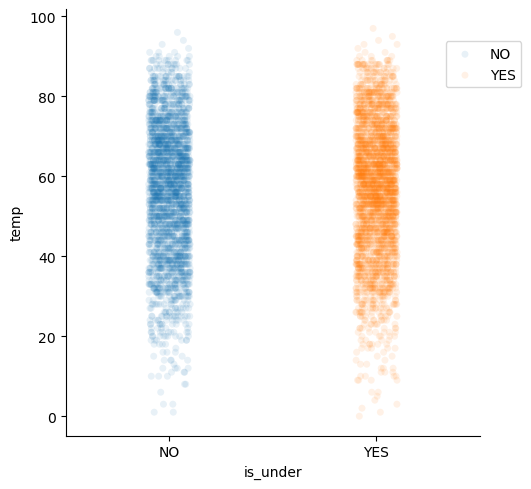

In [6]:
ex.exp_1()

#### Slightly differeing distributions...colder games may lead to more OVERS, but the difference may not be statistically significant. However, we may very well have the Power to identify a difference should one exist. No pressing need to run a T-test yet.

### WIND vs TARGET: OUTDOOR games

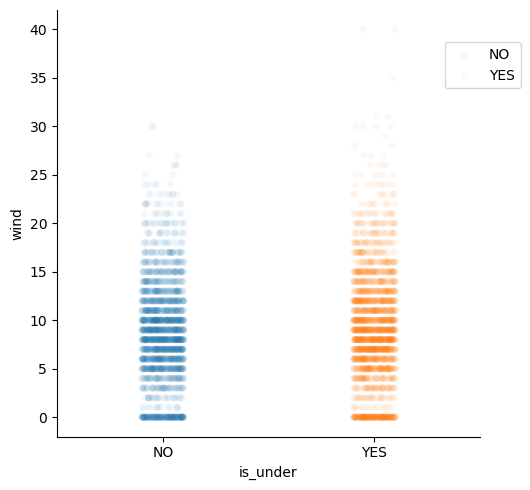

In [7]:
ex.exp_2()

#### MEAN Wind Speed of ALL UNDER games vs MEAN Wind Speed of ALL OVER games

#### Does a statistically significant difference exist between Wind Speed of ALL UNDER games vs MEAN Wind Speed of ALL OVER games?
#### T-test, 2-sample, 2-tailed


### Hypotheses:
- ${H_0}$: No statistically significant difference exists between mean wind speed for UNDER games and that of OVER games.
- ${H_a}$: A statistically significant difference exists between mean wind speed for UNDER games and that of OVER games.

In [8]:
ex.stat_1()

3.9540841378709994 7.764812347880434e-05 0.05
p = 0.000078


#### With a p-value well below ${a}$ = 0.05, we reject the null hypothesis. There is evidence to suggest that the two samples were drawn from different populations. i.e. Wind Speed may play a role in determining the outcome of the wager.

## Quick look at heat map? You know you want to...

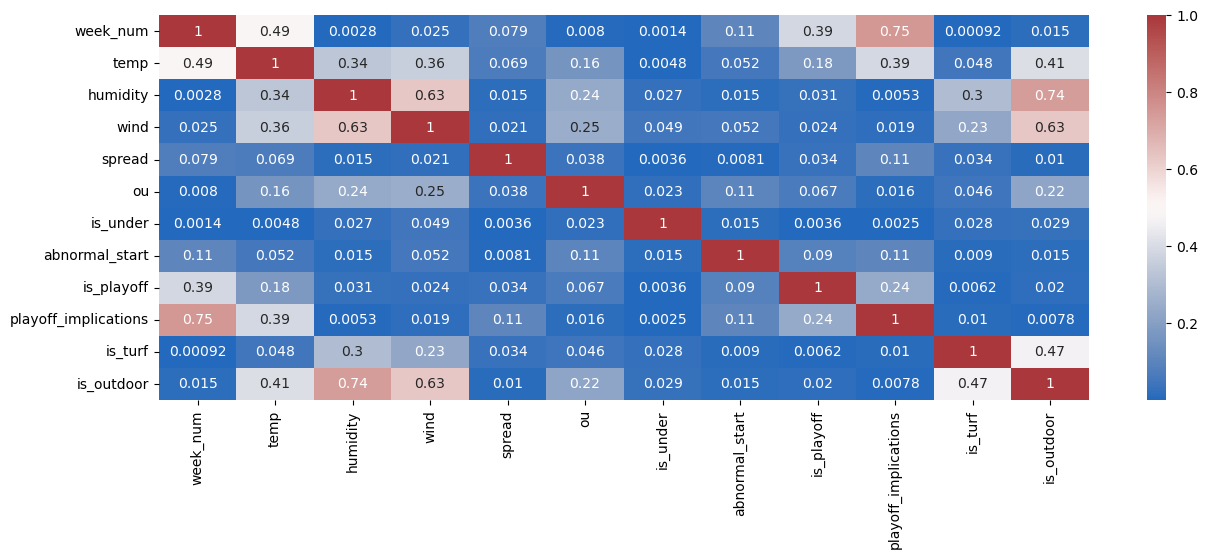

In [9]:
ex.heatmap()

#### No feature appears to correlate strongly with TARGET (is_under)

## ABNORMAL_start vs TARGET: ALL games

<Figure size 800x600 with 0 Axes>

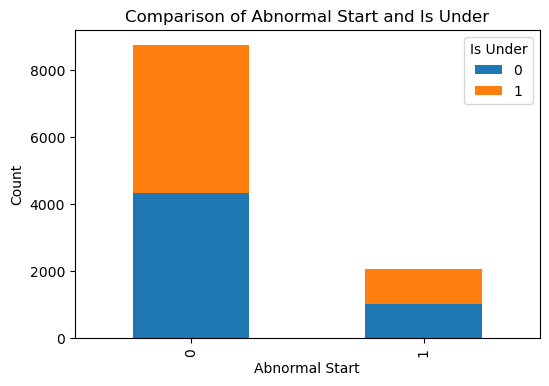

In [10]:
ex.exp_3()